In [2]:
import pandas as pd
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [ ]:
# X: Size (sqft), Number of Bedrooms, Number of floors, Age of Home
# y: Price (1000s dollars)
URL = "https://raw.githubusercontent.com/mihir1125/machine-learning/master/houses.csv"
X_train, y_train = load_data(URL)
X_features = ["Size (sqft)", "Number of Bedrooms", "Number of floors", "Age of Home"]
y_label = "Price (1000s dollars)"

In [ ]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [8]:
#@title Functions
predict = lambda x, w, b: np.dot(x, w) + b

def load_data(url):
    data = np.array(pd.read_csv(URL, header = None))
    no_of_features = data.shape[-1] - 1
    x = data[:, :no_of_features]
    y = data[:, -1]
    return x, y

def compute_cost(X, y, w, b):
    m = X.shape[0] # No. of training examples
    cost = 0.0
    for i  in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    m, n = X.shape # No. of examples, features
    dJ_dw = np.zeros(n)
    dJ_db = 0.

    for i in range(m):
        err = predict(X[i], w, b) - y[i]
        for j in range(n):
            dJ_dw[j] = dJ_dw[j] + err * X[i, j]
        dJ_db += err
    dJ_dw /= m
    dJ_db /= m

    return dJ_dw, dJ_db

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = [] # For graphing later
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dJ_dw, dJ_db = compute_gradient(X, y, w, b)
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db
        if i < 100_000:
            J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:10.4f}")

    print(f"w and b found by graident descent: w: {list(w)}, b: {b}")
    return w, b, J_history

def normalize_z_score(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

In [ ]:
# Testing the implementation

initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1_000
alpha = 5.0e-7

w_final, b_final, J_history = gradient_descent(
    X = X_train,
    y = y_train,
    w_in = initial_w,
    b_in = initial_b,
    cost_function = compute_cost,
    gradient_function = compute_gradient,
    alpha = alpha,
    num_iters = iterations
)

Iteration    0: Cost  2529.4630
Iteration  100: Cost   695.9903
Iteration  200: Cost   694.9207
Iteration  300: Cost   693.8604
Iteration  400: Cost   692.8094
Iteration  500: Cost   691.7676
Iteration  600: Cost   690.7349
Iteration  700: Cost   689.7112
Iteration  800: Cost   688.6965
Iteration  900: Cost   687.6906


## Feature scaling

In [ ]:
# z-score normalization
X_norm, mu, sigma = normalize_z_score(X_train)

initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1_00
alpha = 0.5

w_norm, b_norm, J_history = gradient_descent(
    X = X_norm,
    y = y_train,
    w_in = initial_w,
    b_in = initial_b,
    cost_function = compute_cost,
    gradient_function = compute_gradient,
    alpha = alpha,
    num_iters = iterations
)

Iteration    0: Cost 18137.0308
Iteration   10: Cost   253.5392
Iteration   20: Cost   220.6181
Iteration   30: Cost   219.7356
Iteration   40: Cost   219.7120
Iteration   50: Cost   219.7113
Iteration   60: Cost   219.7113
Iteration   70: Cost   219.7113
Iteration   80: Cost   219.7113
Iteration   90: Cost   219.7113


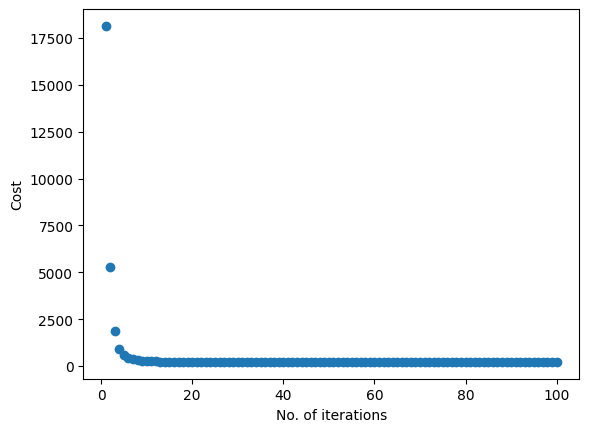

In [ ]:
x = np.arange(1, len(J_history)+1)
fig, ax= plt.subplots()
ax.scatter(x, J_history)
ax.set_xlabel("No. of iterations")
ax.set_ylabel("Cost")
plt.show()

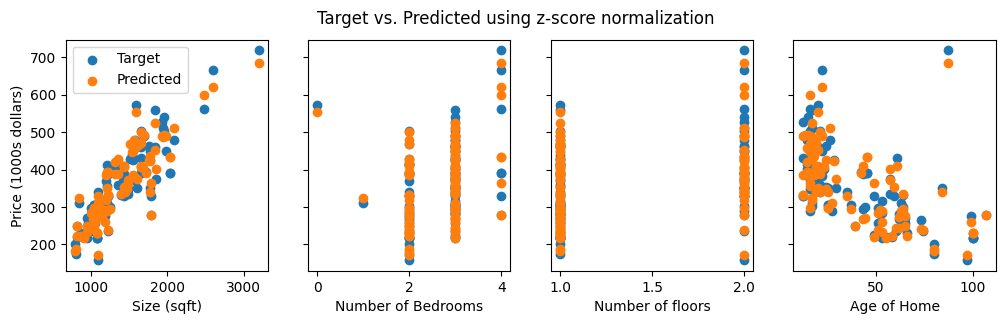

In [ ]:
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

# Plot prediction vs. target
fig, ax = plt.subplots(1, 4, figsize = (12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label = 'Target')
    ax[i].scatter(X_train[:, i], yp, label = 'Predicted')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel(y_label)
ax[0].legend()
fig.suptitle("Target vs. Predicted using z-score normalization")
plt.show()

## Feature engineering

### Before feature engineering

In [13]:
# Create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

alpha = 1.0e-5
iterations = 10000
w, b, J_history = gradient_descent(
    X, y, [0], 0, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost 14157.5914
Iteration 1000: Cost  1981.0426
Iteration 2000: Cost   965.4959
Iteration 3000: Cost   878.8496
Iteration 4000: Cost   869.5237
Iteration 5000: Cost   866.6440
Iteration 6000: Cost   864.3122
Iteration 7000: Cost   862.0371
Iteration 8000: Cost   859.7778
Iteration 9000: Cost   857.5308
w and b found by graident descent: w: [14.712451562279416], b: -0.3834240070617681


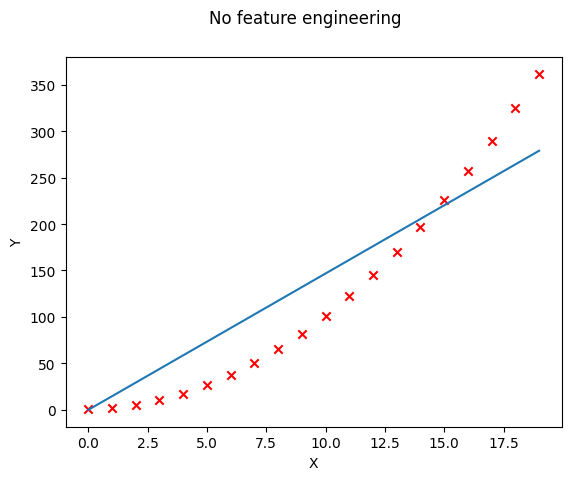

In [17]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker='x', c='r', label="Actual value")
ax.plot(x, X@w + b, label = "Predicted value")
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.suptitle("No feature engineering")
plt.show()

### After feature engineering

In [18]:
# Create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = (x**2).reshape(-1, 1)

alpha = 1.0e-5
iterations = 10000
w, b, J_history = gradient_descent(
    X, y, [0], 0, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost  7329.2181
Iteration 1000: Cost     0.2248
Iteration 2000: Cost     0.2228
Iteration 3000: Cost     0.2208
Iteration 4000: Cost     0.2188
Iteration 5000: Cost     0.2168
Iteration 6000: Cost     0.2148
Iteration 7000: Cost     0.2128
Iteration 8000: Cost     0.2109
Iteration 9000: Cost     0.2090
w and b found by graident descent: w: [1.0041749387228514], b: 0.04896443659681638


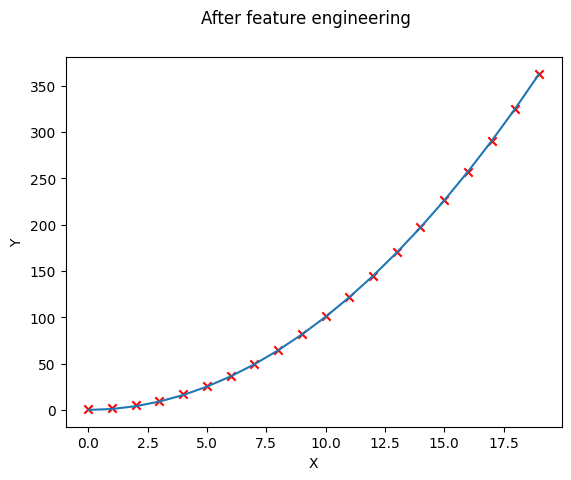

In [20]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker='x', c='r', label="Actual value")
ax.plot(x, X@w + b, label = "Predicted value")
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.suptitle("After feature engineering")
plt.show()